<a href="https://colab.research.google.com/github/nahuelalmeira/poblacionPenal/blob/master/DiploDatos_PoblacionPenitenciariaArgentina_VyA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DiploDatos 2019 -  Población Penitenciaria en Argentina




> http://diplodatos.famaf.unc.edu.ar/poblacion-penitenciaria-en-argentina-2002-a-2017/




## Practico Análisis y Visualización de Datos

En este notebook se explicarán los métodos para la carga inicial de los datos que vamos a usar en el proyecto, se describirá la estructura general de los mismos, y veremos algunos métodos básicos de análisis.

Antes de comenzar a trabajar con CSVs, siempre es recomendable descargar el dataset en nuestra computadora y observarlo directamente con alguna herramienta de procesamiento de texto , para tener una visión rápida del tipo de datos con el cual trabajeremos, pero también para asegurarnos que estamos utilizando un archivo con el formato correcto.

In [70]:
### Aumentar el ancho del notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

### Inicialización y carga de datos

In [71]:
# Importamos las librerías necesarias
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_columns', 100)

#
sys.path.append('../config')
from mpl_settings_v3 import *

El dataset se encuentra en

https://github.com/camporeale/Datos/raw/master/sneep_2017_diplodatos.zip 

y debe estar descargado en la carpeta '../datasets'. En caso de que no se encuentre el archivo, se leerá online.

In [72]:
## Cargamos el CSV en un dataframe. Si es posible, lo descargamos y 
## sino, lo leemos online. (Para descargarlo es necesario tener instalado wget)

data_dir = '../datasets'
data_file = os.path.join(data_dir, 'sneep_2017_diplodatos.zip')

if not os.path.isfile(data_file):
    print('No se encontró copia local del dataset. Leyendo online')
    data_raw = pd.read_csv(url,compression='zip',index_col=0)
else:
    data_raw = pd.read_csv(data_file, compression='zip', index_col=0)

/home/nahuel/anaconda3/envs/diploDatos/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [73]:
## Seteamos semilla random para reproducibilidad
np.random.seed(0)

### Información disponible

#### Información general

- Año censo
- Tipo de servicio penitenciario
- Provincia
- Establecimiento

#### Información poblacional

- Género
- Nacionalidad
- Estado civil
- Mujeres viviendo con sus niños
- Último lugar de residencia
- Última provincia de residencia
- Nivel de instrucción
- Última situación laboral
- Capacitación laboral al ingresar

#### Información judicial

- Jurisdicción
- Situación legal
- Tipo de delito
- Reincidente
- Establecimiento de procedencia

#### Actividades y otras situaciones registradas dentro de la institución

- Recibió atención médica en el último año
- Recibió visitas en el último año
- Participa en programa laboral
- Horas de trabajo remunerado
- Participa en programa educativo
- Participa en actividades deportivas
- Calificación conducta
- Participó en alteración del orden en el último año
- Tipo de infracción disciplinaria
- Sanción aplicada
- Fue lesionado
- Tentativa de suicidio

#### Condenas y progresividad de la pena

- Condenado a prisión o reclusión perpetua
- Tuvo reducción de pena
- Duración de la condena
- Tuvo salidas transitorias
- Incorporado al régimen de semi libertad
- Participa en programas de pre-libertad
- Participa en programa de prisión discontinua
- Participa en programa de semi detención
- Tiene período de progresividad

### Análisis exploratorio

In [74]:
# Obtenemos la cantidad de filas y columnas
print("Cantidad de registros: ", data_raw.shape[0])
print("Cantidad de columnas: ", data_raw.shape[1])

Cantidad de registros:  85283
Cantidad de columnas:  50


In [75]:
# Listamos las columnas y sus tipos de datos
data_raw.dtypes

anio_censo                                              int64
provincia_descripcion                                  object
establecimiento_descripcion                            object
edad                                                  float64
genero_descripcion                                     object
nacionalidad_descripcion                               object
estado_civil_descripcion                               object
nivel_instruccion_descripcion                          object
ultima_situacion_laboral_descripcion                   object
capacitacion_laboral_al_ingresar_descripcion           object
ultimo_lugar_residencia_descripcion                    object
ultima_provincia_residencia_descripcion                object
jurisdiccion_descripcion                               object
situacion_legal_descripcion                            object
fecha_detencion                                        object
fecha_condenado                                        object
establec

In [76]:
# Analizamos 2 muestras de filas, usamos transpose() para visualizar los datos con mayor comodidad
data_raw.sample(2).transpose()

,53495,75586
anio_censo,2017,2017
provincia_descripcion,Chaco,San Luis
establecimiento_descripcion,SPF - U. 7 PRISION REGIONAL DEL NORTE,COMPLEJO PENITENCIARIO PROVINCIAL - UNIDAD 2 ...
edad,45,25
genero_descripcion,Masculino,Masculino
nacionalidad_descripcion,Argentina,Argentina
estado_civil_descripcion,Soltero,Soltero
nivel_instruccion_descripcion,Primario completo,Secundario incompleto
ultima_situacion_laboral_descripcion,Desocupado,Trabajador de tiempo parcial
capacitacion_laboral_al_ingresar_descripcion,No tiene ni oficio ni profesión,Tiene algún oficio


In [77]:
# Distribución por genero
data_raw["genero_descripcion"].value_counts()

Masculino     81553
Femenino       3602
Transexual      128
Name: genero_descripcion, dtype: int64

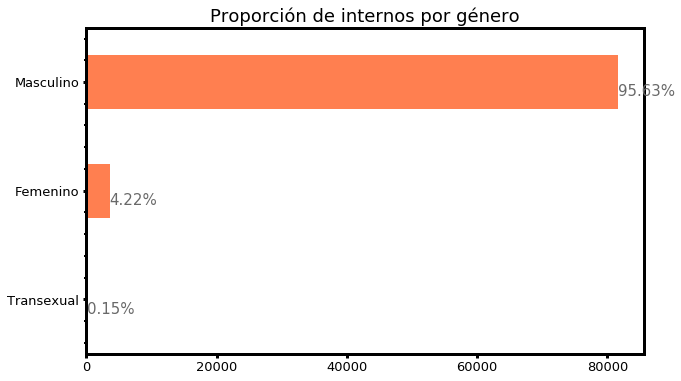

In [78]:
ax = data_raw["genero_descripcion"].value_counts().plot(kind='barh', figsize=(10,6), color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Proporción de internos por género", fontsize=18)
ax.set_xlabel("", fontsize=18);
ax.set_xticks([0, 20000, 40000, 60000, 80000])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

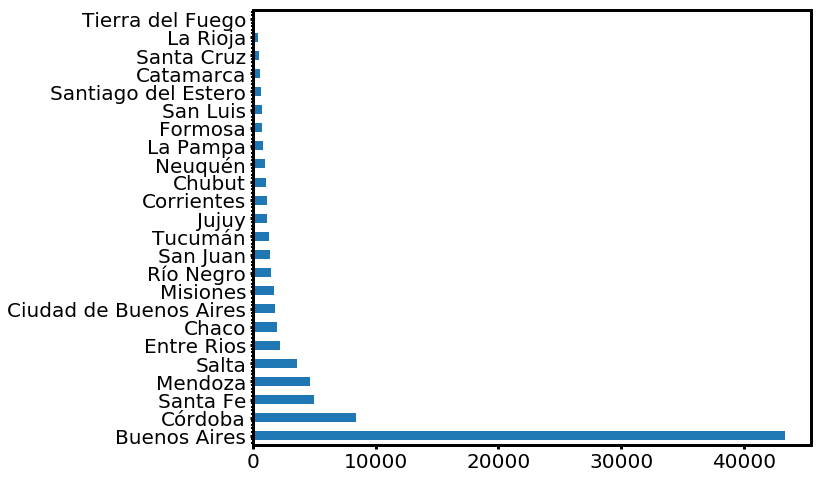

In [79]:
# Internos por provincia
plt.figure(figsize=(10, 8))
ax = plt.gca()
data_raw["provincia_descripcion"].value_counts().plot(kind='barh', ax=ax, fontsize=20)
plt.show()

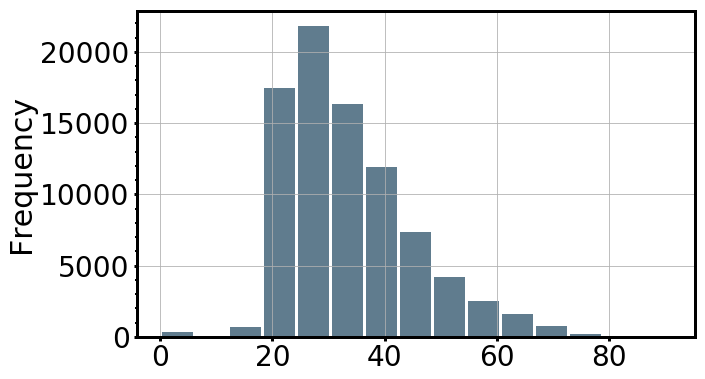

In [80]:
# Histograma por edades
data_raw["edad"].plot.hist(grid=True, bins=15, rwidth=0.9,color='#607c8e', figsize=(10,6))
plt.show()

### Análisis del Grupo

En esta sección el grupo de trabajo deberá realizar el siguiente análisis:



*   Análisis estadístico de variables


> Seleccionar un conjunto de al menos 4 variables que resulten de interés para el grupo y:
1.   Usar distintos tipos de gráficos para describir sus distribuciones
2.   Analizar Outliers
3.   Calcular estadísticos clásicos (media, mediana, moda, desviación estandar)



*   Evolución de variables en el tiempo. Seleccionar 2 variables y graficar como fueron cambiando desde 2002 a 2017.  Para ello se tiene que utilizar el siguiente conjunto de datos:

https://github.com/camporeale/Datos/raw/master/sneep_2002_2017_diplodatos.zip




*   Analisis de probabilidades condicionales. Tomar al menos dos pares de variables y realizar un análisis del tipo:



> ¿Cual es la probabilidad de que el interno haya sido lesionado en el último año dado que está en una  prisión en Buenos Aires? ¿Y en Córdoba? 

> ¿Cual es la probabilidad de que se le otorguen salidas provisorias dado que esté casado/a? ¿Y siendo soltero?



Los siguientes recursos pueden usarse como ejemplos de distintos tipos de análisis:

*   http://www.saij.gob.ar/estadisticas-ejecucion-de-la-pena
*   http://www.jus.gob.ar/media/1126013/Una_Gestion_Penitenciaria_Integral_SNEEP.pdf




## Análisis estadístico de variables

### Edad

26.0


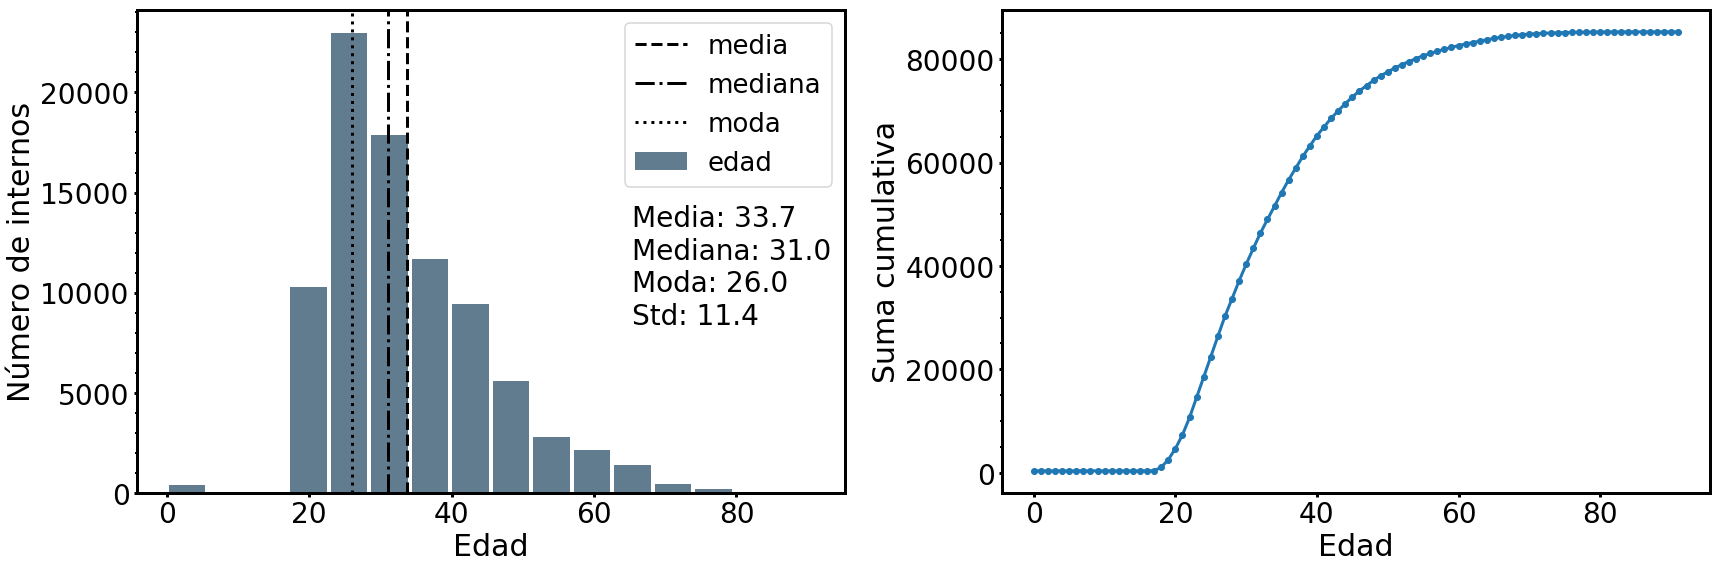

In [81]:
def get_cdf(data):
    """
    Calcula funcion de distribucion cumulativa.
    Data tiene que ser un array de enteros.
    """
    cdf = []
    rango = range(min(data), max(data)+1)
    for e in rango:
        cdf.append((data<=e).sum()) 
    cdf = np.array(cdf)
    return rango, cdf

def get_ccdf(data):
    """
    Plot the complementary cumulative distribution function
    (1-CDF(x)) based on the data on the axes object.
    
    Note that this way of computing and plotting the ccdf is not
    the best approach for a discrete variable, where many
    observations can have exactly same value!
    """
    # Note that, here we use the convention for presenting an 
    # empirical 1-CDF (ccdf) as discussed above
    sorted_vals = np.sort(np.unique(data))
    ccdf = np.zeros(len(sorted_vals))
    n = float(len(data))
    for i, val in enumerate(sorted_vals):
        ccdf[i] = np.sum(data >= val)/n
    return sorted_vals, ccdf



edades = data_raw['edad'].sort_values().dropna().astype('int')
moda = data_raw['edad'].mode().values[0]
media = edades.mean()
mediana = edades.median()
std = edades.std()
print(moda)

# Histograma por edades
fig, axes = plt.subplots(figsize=(24, 8), ncols=2)
ax = axes[0]
data_raw["edad"].plot.hist(bins=16, rwidth=0.9,color='#607c8e', ax=ax)
ax.set_ylabel('Número de internos')
ax.set_xlabel('Edad')
ax.axvline(media, linestyle='--', color='k', label='media')
ax.axvline(mediana, linestyle='-.', color='k', label='mediana')
ax.axvline(moda, linestyle=':', color='k', label='moda')
text = 'Media: {:.1f}\nMediana: {:.1f}\nModa: {:.1f}\nStd: {:.1f}'.format(media, mediana, moda, std)
ax.text(0.7, 0.35, text, transform=ax.transAxes, fontsize=28)
ax.legend(loc='best')
ax = axes[1]
rango_edad, cdf = get_cdf(edades.values)
plt.plot(rango_edad, cdf, '-o')
ax.set_xlabel('Edad')
ax.set_ylabel('Suma cumulativa')

plt.tight_layout()
plt.show()

Observamos que existen registros de edades correspondientes a menores de edad. Veamos qué edad tienen

In [82]:
from collections import Counter
Counter(edades[edades<18])

Counter({0: 369, 16: 8, 17: 11})

La mayoría de los registros presentan edad igual a 0. Esto podría tratarse de niños nacidos dentro de algún establecimiento penitenciario

### Duración de condena

Antes que nada, tenemos que separar los registros que tienen condena firme de los que no tienen. Veamos qué tipos de situación legal existe.

In [83]:
count_condena = data_raw.groupby(by='situacion_legal_descripcion')['situacion_legal_descripcion'].count()
print(count_condena)
print('')
print('Porcentaje de internos sin condena firme: {:.1f}%'.format(100*count_condena['Condenado'] / count_condena.sum()))

situacion_legal_descripcion
Condenado         46405
Inimputable         281
Otra situación      282
Procesado         38315
Name: situacion_legal_descripcion, dtype: int64

Porcentaje de internos sin condena firme: 54.4%


Vemos que poco más de la mitad de los internos tiene condena firme. En adelante, filtraremos sólo estos registros.

In [84]:
data_condena = data_raw[data_raw['situacion_legal_descripcion']=='Condenado']

Consideremos los campos: duracion_condena_anios y duracion_condena_meses. Primero veamos que los valores de duracion_condena_meses estén acotados entre 0 y 11.

In [85]:
np.sort(data_condena['duracion_condena_meses'].unique())

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., nan])

Los valores de duracion_condena_anios deberían ser enteros no negativos.

In [86]:
np.sort(data_condena['duracion_condena_anios'].unique())

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       40., 46., 50., nan])

TODO Ver qué significa la columna duracion_condena_rango

In [87]:
np.sort(data_condena['duracion_condena_rango'].unique())

array([1, 2, 3, 4, 5, 6, 7, 8])

En ambos casos encontramos valores nulos. Veamos cuántos registros tenemos con información faltante.

In [88]:
total = data_condena[['duracion_condena_meses', 'duracion_condena_anios']].shape[0]
ambos_nulos = total - data_condena[['duracion_condena_meses', 'duracion_condena_anios']].dropna(how='all').shape[0]
anios_nulos = total - data_condena[['duracion_condena_anios']].dropna().shape[0]
meses_nulos = total - data_condena[['duracion_condena_meses']].dropna().shape[0]

print('Campo duracion_condena_meses nulo:', meses_nulos)
print('Campo duracion_condena_anios nulo:', anios_nulos)
print('Ambos campos nulos:', ambos_nulos)

Campo duracion_condena_meses nulo: 32
Campo duracion_condena_anios nulo: 1
Ambos campos nulos: 0


Como se trata de pocos registros, podemos descartarlos sin afectar la estadística para hacer el análisis.

In [89]:
data_condena = data_condena.dropna(subset=['duracion_condena_anios', 'duracion_condena_meses'])

Lo próximo sería ver si existen campos con duración de condena de 0 años y 0 meses.

In [90]:
mask = (data_condena['duracion_condena_meses'] == 0) & (data_condena['duracion_condena_anios'] == 0)
count = data_condena[mask].shape[0]
print('Condenas de 0 años y 0 meses:', count)
print('Porcentaje del total: {:.1f}%'.format(100 *count / data_condena.shape[0]))

Condenas de 0 años y 0 meses: 3649
Porcentaje del total: 7.9%


Vemos que aproximadamente un 8% de los registros cae en esta categoría. Dos hipótesis que podemos manejar son que se trate de internos con condena inferior a un mes, o que sea un error de carga (por ejemplo, cargar un 0 en lugar de un NaN). Como no tenemos aún información suficiente como para poner a prueba estas hipótesis, vamos a descartar estos registros para el análisis.

In [91]:
data_condena = data_condena[~mask]
data_condena.shape

(42723, 50)

Para hacer el análisis, definimos una nueva columna con la duración en años, con los meses incluidos.

In [92]:
data_condena['duracion_condena_anios_total'] = data_condena['duracion_condena_anios'] + data_condena['duracion_condena_meses']/12

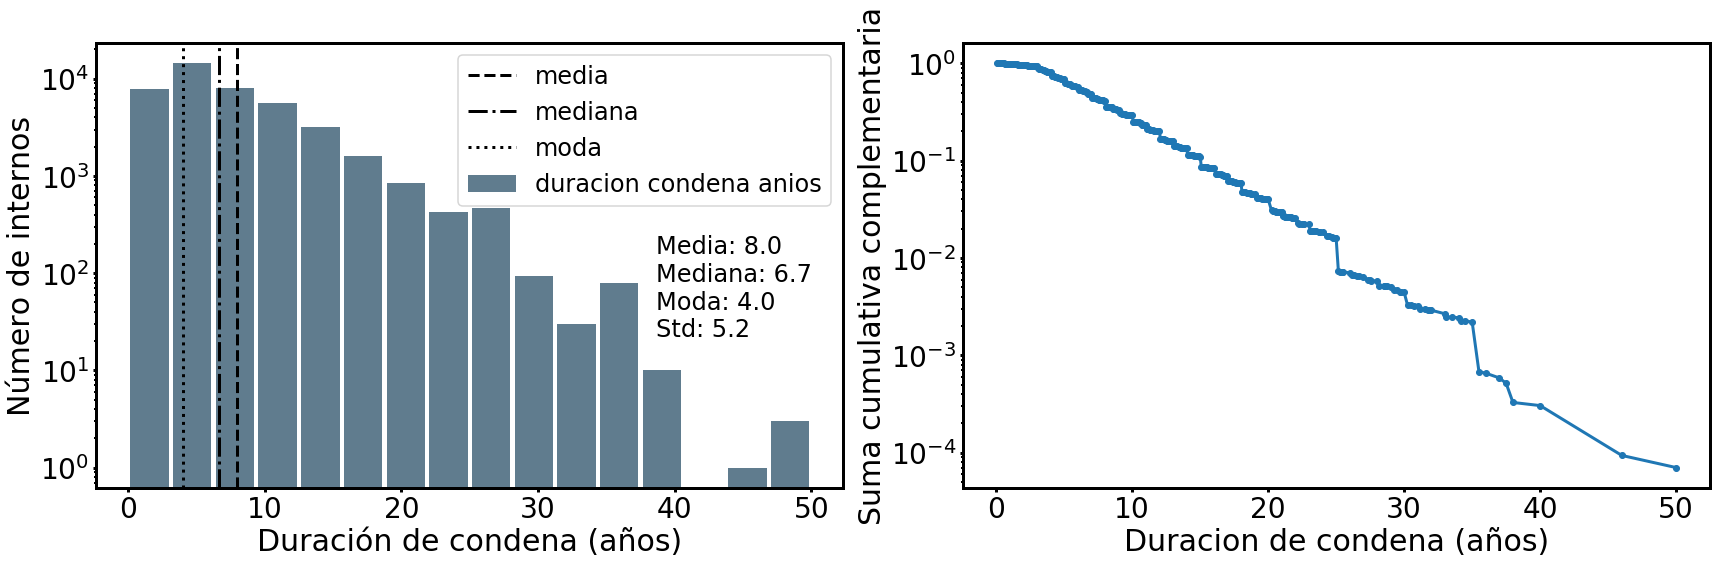

In [93]:
anios = data_condena['duracion_condena_anios_total'].sort_values().dropna()
moda = data_condena['duracion_condena_anios_total'].mode().values[0]
media = anios.mean()
mediana = anios.median()
std = anios.std()

# Histograma por edades
fig, axes = plt.subplots(figsize=(24, 8), ncols=2)
ax = axes[0]
data_condena["duracion_condena_anios"].plot.hist(bins=16, rwidth=0.9,color='#607c8e', ax=ax, label='duracion condena anios')
ax.set_yscale('log')
ax.set_ylabel('Número de internos')
ax.set_xlabel('Duración de condena (años)')
ax.axvline(media, linestyle='--', color='k', label='media')
ax.axvline(mediana, linestyle='-.', color='k', label='mediana')
ax.axvline(moda, linestyle=':', color='k', label='moda')
text = 'Media: {:.1f}\nMediana: {:.1f}\nModa: {:.1f}\nStd: {:.1f}'.format(media, mediana, moda, std)
ax.text(0.75, 0.34, text, transform=ax.transAxes, fontsize=24)
ax.legend(loc='best', fontsize=24)
ax = axes[1]
rango_edad, ccdf = get_ccdf(anios.values)
ax.plot(rango_edad, ccdf, '-o')
ax.set_yscale('log')
ax.set_xlabel('Duracion de condena (años)')
ax.set_ylabel('Suma cumulativa complementaria')

plt.tight_layout()
plt.show()

La duración de condenas parece decaer exponencialmente.

In [94]:
from scipy.stats import kstest
kstest(anios, 'expon')

KstestResult(statistic=0.8824274296776853, pvalue=0.0)

De acuerdo con el test de KS, la distribución no es exponencial. TODO hacer algún otro test. Puede ser Poisson?

Obtenemos el parámetro de la distribución exponencial usando MLE.

Referencia: https://www.comp.nus.edu.sg/~limkw/pubs/Lim_MLE_2017.pdf

Para la distribución $p(x) = \lambda e^{-\lambda x}$, el estimador insesgado está dado por 

$$
\hat{\lambda} = \dfrac{N-1}{\sum_{i=1}^N x_i},
$$

y su varianza está dada por 

$$
\mathrm{V}[\hat{\lambda}] = \dfrac{\hat{\lambda}^2}{N-2}.
$$



In [95]:
N = anios.shape[0]

## MLE
l_est = (N-1) / anios.sum()
var_l_est = l_est**2 / (N-2)
std_l_est = np.sqrt(var_l_est)
print(l_est, '+-', std_l_est)

## Error
l_est_max = l_est + std_l_est
l_est_min = l_est - std_l_est

X_MLE = np.linspace(0, 50, 100)
Y_MLE = l_est*np.exp(-l_est*X_MLE)
Y_max = l_est_max*np.exp(-l_est_max*X_MLE)
Y_min = l_est_min*np.exp(-l_est_min*X_MLE)

0.125517886391848 +- 0.0006072743146354119


Ajuste por mínimos cuadrados sobre la CCDF

In [96]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression() 
X_LS = rango_edad.reshape(-1, 1)
Y_LS = np.log(ccdf).reshape(-1, 1)
linear_regressor.fit(X_LS, Y_LS)  # perform linear regression
Y_pred = linear_regressor.predict(X_LS)  # make predictions
slope = linear_regressor.coef_[0][0]
r2 = linear_regressor.score(X_LS, Y_LS)

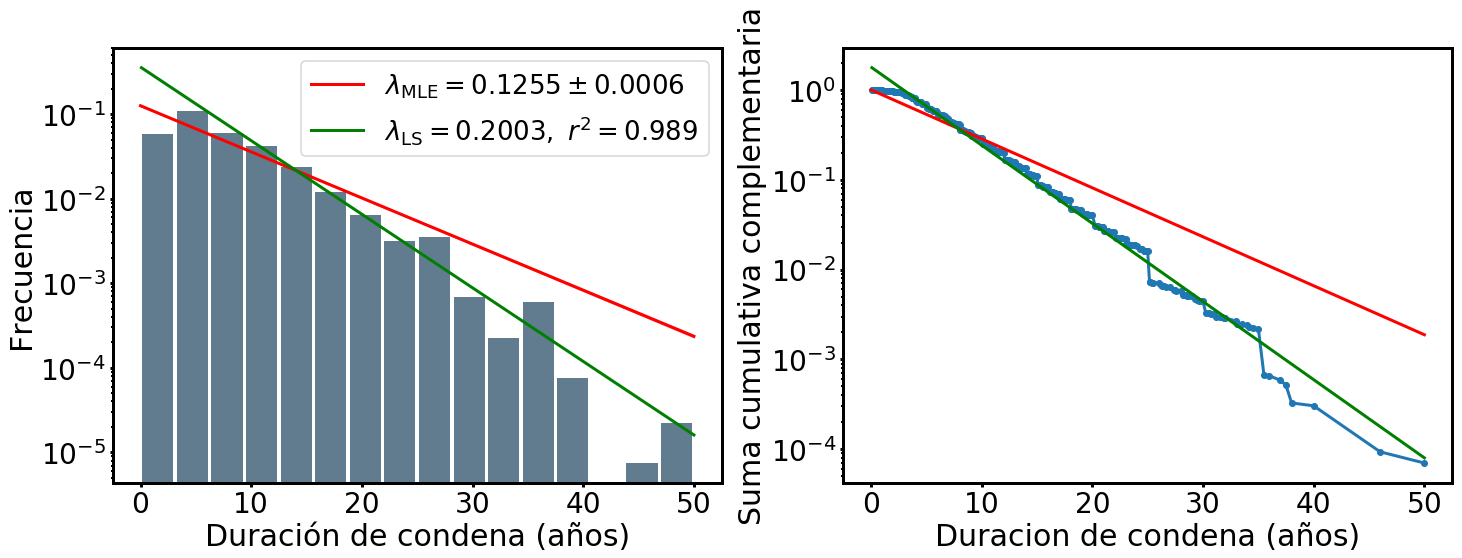

In [97]:
fig, axes = plt.subplots(figsize=(24, 8), ncols=2)
ax = axes[0]
data_condena["duracion_condena_anios"].plot.hist(bins=16, rwidth=0.9,color='#607c8e', ax=ax, density=True, label='')
ax.set_yscale('log')
ax.set_ylabel('Frecuencia')
ax.set_xlabel('Duración de condena (años)')
ax.plot(X_MLE, Y_MLE, color='red', label=r'$\lambda_{\mathrm{MLE}} = $' + r'$ {{{:.4f}}}\pm {{{:.4f}}}$'.format(l_est, std_l_est))
ax.plot(X_LS, -slope*np.exp(Y_pred), color='green', 
        label=r'$\lambda_{\mathrm{LS}} = $' + r'$ {{{:.4f}}},$'.format(-slope) + r' ' + r'$ r^2 = {{{:.3f}}}$'.format(r2))
ax.fill_between(X_MLE, Y_min, Y_max, alpha=0.5, color='red')
ax.legend(loc='best')

ax = axes[1]
ax.set_yscale('log')
ax.set_xlabel('Duracion de condena (años)')
ax.set_ylabel('Suma cumulativa complementaria')
X = np.linspace(0, 50, 100)
Y = np.exp(-l_est*X) 
ax.plot(rango_edad, ccdf, '-o')
ax.plot(X, Y, color='red')
ax.plot(X_LS, np.exp(Y_pred), color='green')

plt.show()

Visualmente se puede ver que el estimador ML no da un buen resultado. Mínimos cuadrados ajusta mejor. Sin embargo, habría que hacer más tests para determinar si la distribución de tiempos de condena es realmente exponencial.

## Análisis temporal

In [98]:
temporal_data_file = '../datasets/sneep_2002_2017_diplodatos.zip'
temp_data = pd.read_csv(temporal_data_file, compression='zip', index_col=0)

/home/nahuel/anaconda3/envs/diploDatos/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (22,41,42,43,44,45,47,48,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [99]:
temp_data.sample(5)

,anio_censo,provincia_descripcion,establecimiento_descripcion,edad,genero_descripcion,nacionalidad_descripcion,estado_civil_descripcion,nivel_instruccion_descripcion,ultima_situacion_laboral_descripcion,capacitacion_laboral_al_ingresar_descripcion,ultimo_lugar_residencia_descripcion,ultima_provincia_residencia_descripcion,jurisdiccion_descripcion,situacion_legal_descripcion,fecha_detencion,fecha_condenado,establecimiento_procedencia_descripcion,delito1_descripcion,delito2_descripcion,delito3_descripcion,delito4_descripcion,delito5_descripcion,horas_trabajo_remunerado_descripcion,participacion_programa_laboral,participacion_programa_educativo_descripcion,participacion_actividades_deportivas,recibio_atencion_medica_ult_anio_descripcion,recibio_visitas_ultimo_anio,participo_alteracion_orden_ult_anio_descripcion,tipo_infraccion_disciplinaria_descripcion,sancion_aplicada_descripcion,calificacion_conducta_descripcion,tentativa_fugas_evasiones_descripcion,tentativa_suicidio,fue_lesionado_descripcion,duracion_condena_anios,duracion_condena_meses,duracion_condena_rango,tipo_condena,tiene_medidas_seguridad,es_reincidente_descripcion,tiene_periodo_progresividad_descripcion,reparticion_descripcion,tuvo_salidas_transitorias_descripcion,incorporado_reg_semi_libertad_descripcion,participa_programa_pre_libertad,participa_programa_prision_discontinua_descripcion,participa_programa_semi_detencion_descripcion,tuvo_reduccion_pena_descripcion,mujer_tiene_hijos_intramuro
923623,2017,Río Negro,SPF - U. 5 COLONIA PENAL SUBPREFECTO MIGUEL RO...,37.0,Masculino,Argentina,Soltero,Secundario incompleto,Desocupado,No tiene ni oficio ni profesión,Urbano,Ciudad de Buenos Aires,NACIONAL - Ciudad de Buenos Aires,Condenado,2005-11-15,2017-04-14,Deriv. de otro establecimiento,Robo y/o tentativa de robo,Delitos contra la seguridad pública,Violaciones,NaN,NaN,Hasta 40 hs. Semanales,0.0,Si - educación formal - SECUNDARIA (Polimodal),1.0,SI - OTRAS ENFERMEDADES,1.0,No participó de ninguna alteración,No cometió Infracción disciplinaria,NaN,Ejemplar,No,0.0,"Si, por otros motivos",15.0,0.0,5,0.0,1.0,2,3,1,1,0,1.0,1,4,NaN,NaN
872430,2017,Buenos Aires,UNIDAD 6 - DOLORES,59.0,Masculino,Chilena,Soltero,Terciario incompleto,Trabajador de tiempo parcial,Tiene algún oficio,Urbano,Buenos Aires,PROVINCIAL - Buenos Aires,Procesado,2009-03-27,NaN,Deriv. de una instit. Policial,Homicidios dolosos,NaN,NaN,NaN,NaN,No tiene trabajo remunerado,0.0,Si - educación no formal (Cursos),1.0,Si - Recibió Asistencia Médica,1.0,No participó de ninguna alteración,No cometió Infracción disciplinaria,NaN,Ejemplar,No,0.0,No fue lesionado,0.0,0.0,0,NaN,0.0,0,1,0,0,NaN,0.0,0,0,NaN,NaN
514762,2012,Buenos Aires,UNIDAD 28 - MAGDALENA,33.0,Masculino,Argentina,Soltero,Primario incompleto,Desocupado,No tiene ni oficio ni profesión,Rural,Buenos Aires,PROVINCIAL - Buenos Aires,Procesado,NaN,NaN,Deriv. de una instit. Policial,Robo y/o tentativa de robo,NaN,NaN,NaN,NaN,No tiene trabajo remunerado,0.0,No participa de ningún programa educativo,1.0,No,0.0,No participó de ninguna alteración,No cometió Infracción disciplinaria,NaN,Sin calificación,No,0.0,No fue lesionado,0.0,0.0,0,NaN,NaN,NaN,NaN,Provincial,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185771,2006,Buenos Aires,UNIDAD 28 - MAGDALENA,23.0,Masculino,Argentina,Concubino,Primario completo,Trabajador de tiempo parcial,No tiene ni oficio ni profesión,Urbano,Buenos Aires,PROVINCIAL - Buenos Aires,Procesado,2000-05-21,NaN,Ingreso directo,Robo y/o tentativa de robo,NaN,NaN,NaN,NaN,No tiene trabajo remunerado,0.0,No participa de ningún programa educativo,1.0,Si - Recibió Asistencia Médica,1.0,SI - Alteración del orden con heridos o muertos,Faltas graves,Perm. aloj. indiv. o celda hasta 15 días inint.,Muy buena,No,0.0,No fue lesionado,0.0,0.0,0,NaN,NaN,NaN,NaN,Provincial,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80908,2003,San Juan,SERVICIO PENITENCIARIO PROVINCIAL CRIO. GRAL. ...,31.0,Masculino,Argentina,Soltero,Primario incompleto,Trabajador de tiempo parcial,No tiene ni oficio ni profesi

Corroboremos que tenemos datos de todos los años entre 2002 y 2017

In [100]:
temp_data['anio_censo'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017])

### Situación legal

Veamos cómo evoluciona la cantidad de internos condenados y procesados a lo largo de los años, y si nuestro análisis se condice con el de la nota de chequeado:

https://chequeado.com/ultimas-noticias/martin-casares-por-primera-vez-en-la-historia-en-2017-el-porcentaje-de-condenados-supero-al-de-procesados/



In [101]:
pivot = temp_data.dropna(subset=['situacion_legal_descripcion']).pivot_table(index='anio_censo', 
                                                                             columns='situacion_legal_descripcion', 
                                                                             values='provincia_descripcion', aggfunc='count')

mask = temp_data['provincia_descripcion'] == 'Buenos Aires'
pivot_ba = temp_data[mask].dropna(subset=['situacion_legal_descripcion']).pivot_table(index='anio_censo', 
                                                                                     columns='situacion_legal_descripcion', 
                                                                                     values='provincia_descripcion', aggfunc='count')

pivot

situacion_legal_descripcion,Condenado,Contraventor,Inimputable,Otra situación,Procesado
anio_censo,,,,,
2002,17756.0,4.0,424.0,308.0,26477.0
2003,16803.0,12.0,477.0,143.0,25117.0
2004,21054.0,9.0,674.0,249.0,31043.0
2005,18906.0,2.0,353.0,196.0,24232.0
2006,20537.0,3.0,583.0,253.0,29052.0
2007,20196.0,1.0,590.0,221.0,29972.0
2008,21333.0,17.0,552.0,156.0,31389.0
2009,23590.0,29.0,514.0,216.0,30409.0
2010,27320.0,85.0,509.0,171.0,30832.0


In [102]:
condenados = pivot['Condenado']
procesados = pivot['Procesado']
condenados_ba = pivot_ba['Condenado']
procesados_ba = pivot_ba['Procesado']

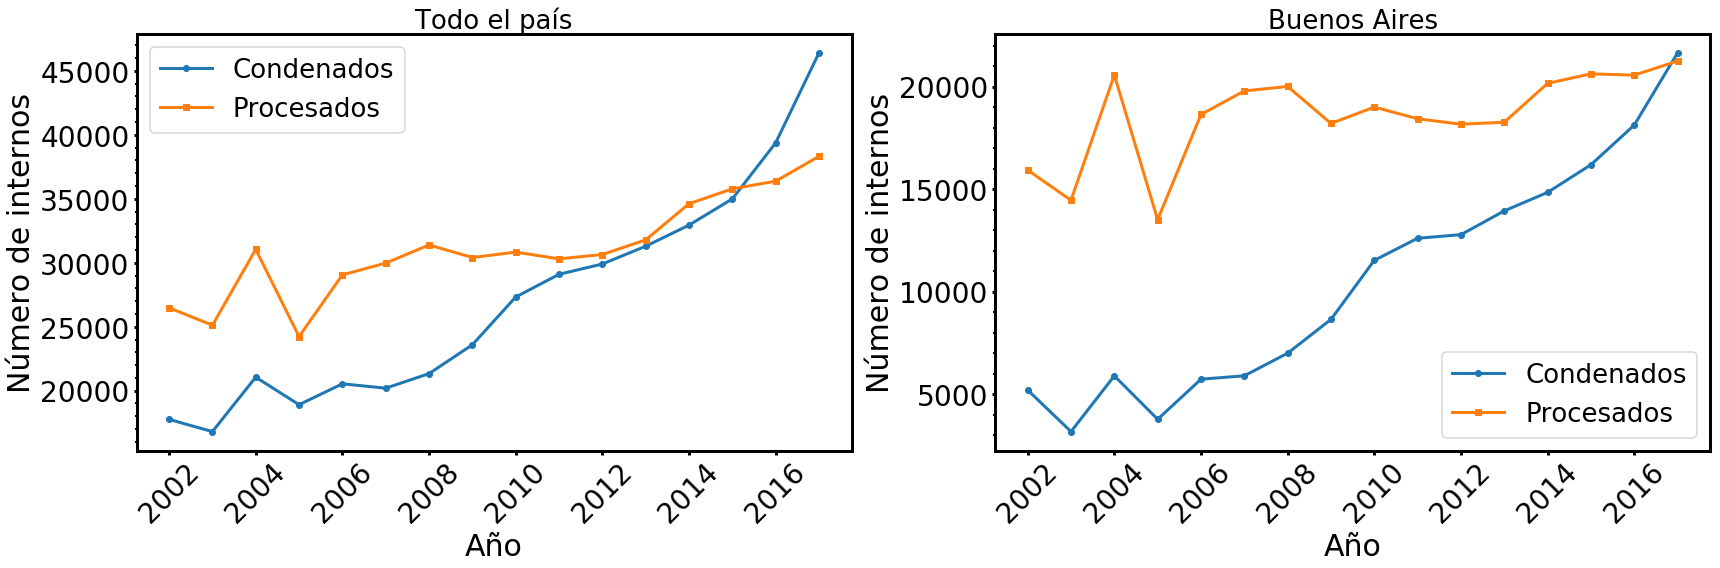

In [103]:
fig, axes = plt.subplots(figsize=(24, 8), ncols=2)
ax = axes[0]
ax.plot(condenados.index, condenados.values, '-o', label='Condenados')
ax.plot(procesados.index, procesados.values, '-s', label='Procesados')
ax.set_title('Todo el país', fontsize=26)
ax.set_xlabel('Año')
ax.set_ylabel('Número de internos')
ax.set_xticks(range(2002, 2018, 2))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.legend(loc='best')

ax = axes[1]
ax.plot(condenados_ba.index, condenados_ba.values, '-o', label='Condenados')
ax.plot(procesados_ba.index, procesados_ba.values, '-s', label='Procesados')
ax.set_title('Buenos Aires', fontsize=26)
ax.set_xlabel('Año')
ax.set_ylabel('Número de internos')
ax.set_xticks(range(2002, 2018, 2))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.legend(loc='best')

plt.tight_layout()
plt.show()

Vemos que nuestro análisis coincide con los gráficos que se muestran en la nota.

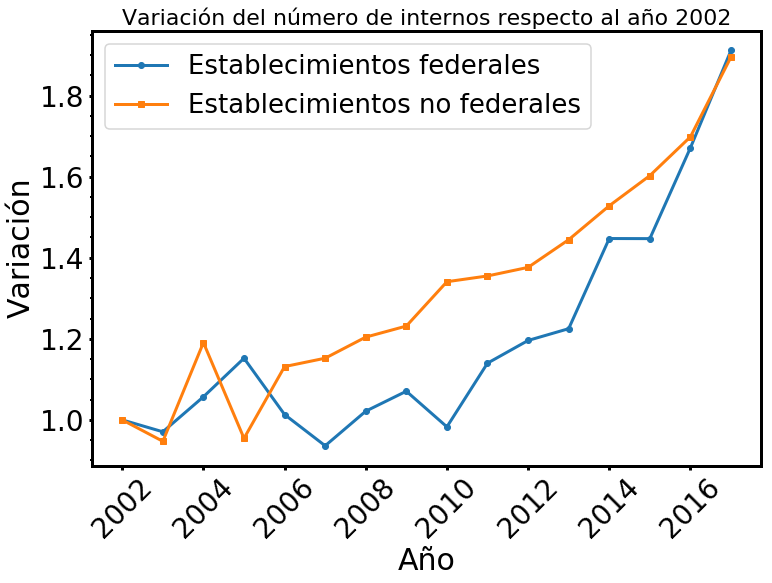

In [104]:
mask = temp_data['jurisdiccion_descripcion'] == 'FEDERAL'
federal = temp_data[mask]['anio_censo'].value_counts().sort_index()
no_federal = temp_data[~mask]['anio_censo'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 8), ncols=1)

ax.plot(federal.index, federal/federal.loc[2002], '-o', label='Establecimientos federales')
ax.plot(no_federal.index, no_federal/no_federal.loc[2002], '-s', label='Establecimientos no federales')
ax.set_xlabel('Año')
ax.set_ylabel('Variación')
ax.set_title('Variación del número de internos respecto al año 2002', fontsize=22)
ax.set_xticks(range(2002, 2018, 2))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.legend(loc='best')
plt.show()

Vemos que hay una tendencia a la suba en la cantidad de internos. Sin embargo, habría que comparar estos datos con el crecimiento demográfico del país como para determinar si la suba es o no consecuencia del aumento poblacional.

## Participación en programas educativos. Evolución temporal

Queremos ver cómo varía la proporción de internos que participa en programas educativos a lo largo del tiempo.

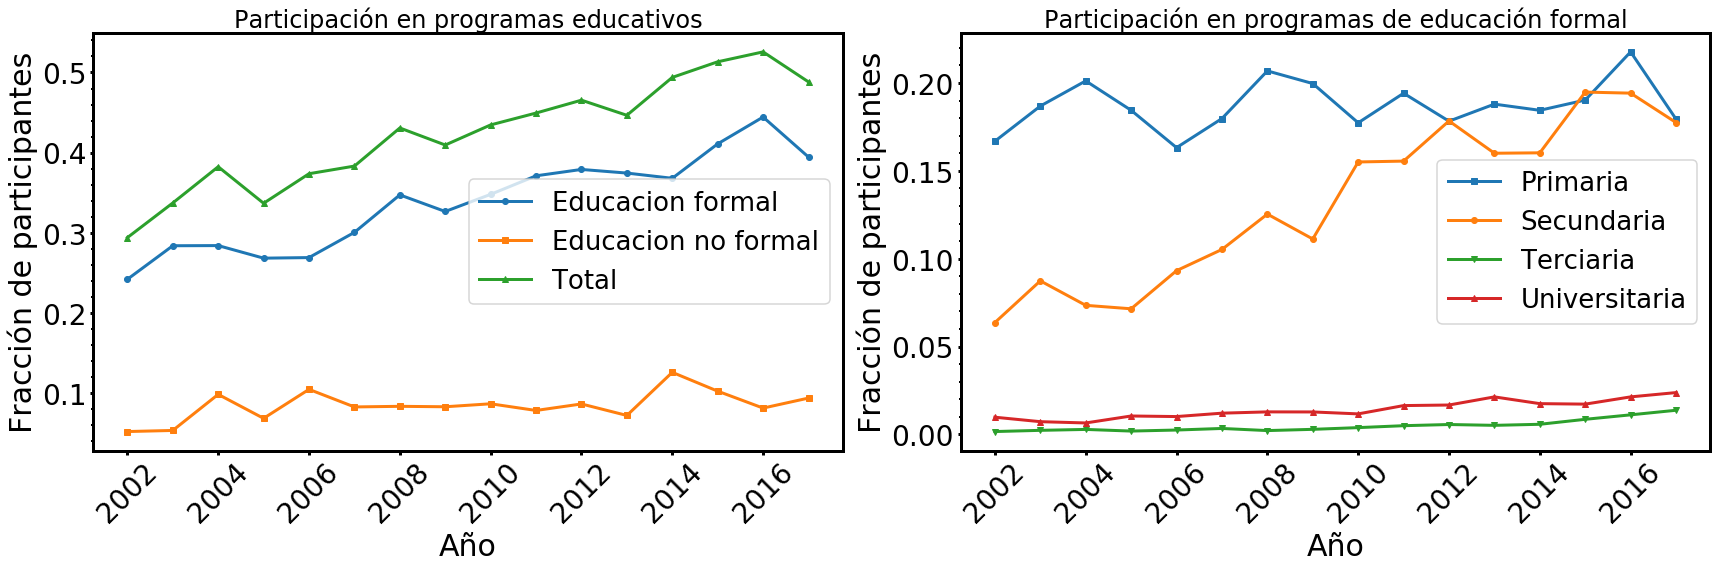

In [105]:
temp_data['participacion_programa_educativo_descripcion'].unique()
contingency = temp_data.pivot_table(index='participacion_programa_educativo_descripcion', columns='anio_censo',
                              values='provincia_descripcion', aggfunc='count', margins=True)
conditionals = (contingency / contingency.loc['All']).T
conditionals = conditionals.drop(['All'])
conditionals = conditionals.drop(['All'], axis=1)
columns = conditionals.columns.values
labels_dict = dict(zip(['No participa', 'Primaria', 'Secundaria', 'Terciaria', 'Universitaria', 'No formal'],
                      columns))
fig, axes = plt.subplots(figsize=(24, 8), ncols=2)

ax = axes[0]
ax.plot(conditionals.index, conditionals.iloc[:,1:-1].sum(axis=1), '-o', label='Educacion formal')
ax.plot(conditionals.index, conditionals[labels_dict['No formal']], '-s', label='Educacion no formal')
ax.plot(conditionals.index, conditionals.iloc[:,1:].sum(axis=1), '-^', label='Total')
ax.set_title('Participación en programas educativos', fontsize=24)
ax.set_ylabel('Fracción de participantes')
ax.set_xlabel('Año')
ax.set_xticks(range(2002, 2018, 2))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.legend(loc='best')

ax = axes[1]
for i, (label, column) in enumerate(list(labels_dict.items())[1:-1]):
    ax.plot(conditionals.index, conditionals[column], marker=markers[i], label=label)
ax.set_title('Participación en programas de educación formal', fontsize=24)
ax.set_ylabel('Fracción de participantes')
ax.set_xlabel('Año')
ax.set_xticks(range(2002, 2018, 2))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.legend(loc='best')

plt.tight_layout()
plt.show()

Se puede ver que la participación en programas de educación formal aumentó a lo largo del tiempo. Desglosando entre los distintos niveles educativos, podemos apreciar que el aumento se dio principalmente en el nivel secundario.

## Diferencias entre internos según nacionalidad

Veamos qué porcentaje de los internos son argentinos y qué porcentaje son extranjeros

In [106]:
nacionalidades = data_raw['nacionalidad_descripcion'].value_counts()
nacionalidades_porcentaje = 100*nacionalidades / nacionalidades.sum()
nacionalidades_porcentaje.name = 'Porcentaje_internos'
pd.DataFrame(nacionalidades_porcentaje)

,Porcentaje_internos
Argentina,94.192768
Paraguaya,1.990178
Peruana,1.131371
Boliviana,1.126671
Chilena,0.413544
Uruguaya,0.382998
Otras,0.278437
Colombiana,0.261989
Brasileña,0.106910
China,0.032896


Ahora nos preguntamos, cuál es la probabilidad de que un interno pertenezca a una dada nacionalidad dado que pertenece a una cárcel federal?

In [107]:
mask = data_raw['jurisdiccion_descripcion'] == 'FEDERAL'
nacionalidades_federales = data_raw[mask]['nacionalidad_descripcion'].value_counts()
nacionalidades_no_federales = data_raw[~mask]['nacionalidad_descripcion'].value_counts()

d = {
    'federales': 100*nacionalidades_federales / nacionalidades_federales.sum(),
    'no_federales': 100*nacionalidades_no_federales / nacionalidades_no_federales.sum()
}

df = pd.DataFrame(d).fillna(0)
df

,federales,no_federales
Argentina,78.600488,95.671692
Boliviana,6.075400,0.657285
Brasileña,0.406835,0.078463
Chilena,0.813670,0.375592
China,0.067806,0.029584
Colombiana,0.664497,0.223811
Ecuatoriana,0.176295,0.015435
Española,0.081367,0.019294
Inglesa,0.000000,0.001286
Italiana,0.027122,0.023153


Contando todos los establecimientos, más del 94% de los internos son argentinos. Sin embargo, si clasificamos según cárceles federales y no federales, vemos que en las cárceles federales existe un porcentaje significativamente menor de argentinos.

## Correlación entre la participación en programas educativos e infracciones disciplinarias

Queremos ver si la participación en programas educativos influye en la cantidad de faltas disciplinarias. Veamos primero las categorías de los campos relevantes.

In [108]:
data_raw['participacion_programa_educativo_descripcion'].value_counts()

No participa de ningún programa educativo         40984
Si - educación formal - PRIMARIA (EGB)            14371
Si - educación formal - SECUNDARIA (Polimodal)    14214
Si - educación no formal (Cursos)                  7510
Si - educación formal - UNIVERSITARIA              1907
Si - educación formal - TERCIARIA                  1101
Name: participacion_programa_educativo_descripcion, dtype: int64

In [109]:
data_raw['tipo_infraccion_disciplinaria_descripcion'].value_counts()

No cometió Infracción disciplinaria    62480
Faltas graves                           9347
Faltas media                            4796
Faltas leves                            2315
Name: tipo_infraccion_disciplinaria_descripcion, dtype: int64

Filtramos los datos nulos

In [110]:
data_reincidencia = data_raw.dropna(subset=['tipo_infraccion_disciplinaria_descripcion', 'participacion_programa_educativo_descripcion'])
data_reincidencia.shape[0]

75720

In [111]:
data_reincidencia['participacion_programa_educativo_descripcion'].value_counts() / \
data_reincidencia['participacion_programa_educativo_descripcion'].count()

No participa de ningún programa educativo         0.512044
Si - educación formal - PRIMARIA (EGB)            0.178051
Si - educación formal - SECUNDARIA (Polimodal)    0.176136
Si - educación no formal (Cursos)                 0.094849
Si - educación formal - UNIVERSITARIA             0.024696
Si - educación formal - TERCIARIA                 0.014223
Name: participacion_programa_educativo_descripcion, dtype: float64

In [112]:
data_reincidencia['tipo_infraccion_disciplinaria_descripcion'].value_counts() / \
data_reincidencia['tipo_infraccion_disciplinaria_descripcion'].count()

No cometió Infracción disciplinaria    0.795510
Faltas graves                          0.114554
Faltas media                           0.059509
Faltas leves                           0.030428
Name: tipo_infraccion_disciplinaria_descripcion, dtype: float64

In [113]:
contingency = data_reincidencia.pivot_table(index='participacion_programa_educativo_descripcion', 
                                            columns='tipo_infraccion_disciplinaria_descripcion',
                                            values='provincia_descripcion', aggfunc='count', margins=True)
contingency

tipo_infraccion_disciplinaria_descripcion,Faltas graves,Faltas leves,Faltas media,No cometió Infracción disciplinaria,All
participacion_programa_educativo_descripcion,,,,,
No participa de ningún programa educativo,3436,1294,2394,31648,38772
Si - educación formal - PRIMARIA (EGB),2120,342,683,10337,13482
Si - educación formal - SECUNDARIA (Polimodal),2010,418,789,10120,13337
Si - educación formal - TERCIARIA,157,41,37,842,1077
Si - educación formal - UNIVERSITARIA,212,52,128,1478,1870
Si - educación no formal (Cursos),739,157,475,5811,7182
All,8674,2304,4506,60236,75720


In [114]:
contingency['Faltas graves'] / contingency['All']

participacion_programa_educativo_descripcion
No participa de ningún programa educativo         0.088621
Si - educación formal - PRIMARIA (EGB)            0.157247
Si - educación formal - SECUNDARIA (Polimodal)    0.150709
Si - educación formal - TERCIARIA                 0.145775
Si - educación formal - UNIVERSITARIA             0.113369
Si - educación no formal (Cursos)                 0.102896
All                                               0.114554
dtype: float64

In [115]:
contingency['Faltas media'] / contingency['All']

participacion_programa_educativo_descripcion
No participa de ningún programa educativo         0.061746
Si - educación formal - PRIMARIA (EGB)            0.050660
Si - educación formal - SECUNDARIA (Polimodal)    0.059159
Si - educación formal - TERCIARIA                 0.034355
Si - educación formal - UNIVERSITARIA             0.068449
Si - educación no formal (Cursos)                 0.066138
All                                               0.059509
dtype: float64

In [116]:
contingency['Faltas leves'] / contingency['All']

participacion_programa_educativo_descripcion
No participa de ningún programa educativo         0.033375
Si - educación formal - PRIMARIA (EGB)            0.025367
Si - educación formal - SECUNDARIA (Polimodal)    0.031341
Si - educación formal - TERCIARIA                 0.038069
Si - educación formal - UNIVERSITARIA             0.027807
Si - educación no formal (Cursos)                 0.021860
All                                               0.030428
dtype: float64

In [117]:
contingency['No cometió Infracción disciplinaria'] / contingency['All']

participacion_programa_educativo_descripcion
No participa de ningún programa educativo         0.816259
Si - educación formal - PRIMARIA (EGB)            0.766726
Si - educación formal - SECUNDARIA (Polimodal)    0.758791
Si - educación formal - TERCIARIA                 0.781801
Si - educación formal - UNIVERSITARIA             0.790374
Si - educación no formal (Cursos)                 0.809106
All                                               0.795510
dtype: float64

## Diferencias entre fecha de condena y fecha de detención


Queremos ver la distribución de tiempos entre el momento de detención y el momento de condena. Para empezar, vemos cuáles son los campos relevantes y los filtramos adecuadamente.

In [118]:
data_raw['fecha_detencion'].head()

0    2017-02-23
1    2016-07-14
2    2015-06-11
3    2017-08-15
4    2016-09-25
Name: fecha_detencion, dtype: object

In [128]:
## Filtro condenados
data_dur_condena = data_raw[data_raw['situacion_legal_descripcion']=='Condenado']

## Columnas relevantes
date_cols = ['fecha_detencion', 'fecha_condenado']


print('Sin filtrar:', data_dur_condena.shape[0])
print('Filtrado:', data_dur_condena.dropna(subset=date_cols).shape[0])

## Filtro valores nulos
data_dur_condena = data_dur_condena.dropna(subset=date_cols)


## Selecciono tipo de datos de columnas como datatime
#data_dur_condena[date_cols] = data_dur_condena[date_cols].astype('datetime64[Y]')
data_dur_condena['fecha_detencion'] = pd.to_datetime(data_dur_condena['fecha_detencion'], format='%Y-%m-%d')
data_dur_condena['fecha_condenado'] = pd.to_datetime(data_dur_condena['fecha_condenado'], format='%Y-%m-%d')

Sin filtrar: 46405
Filtrado: 35983


Veamos los valores extremos de la serie

In [129]:
print('Valores extremos de fechas de detención')
print(data_dur_condena['fecha_detencion'].sort_values()[:3])
print(data_dur_condena['fecha_detencion'].sort_values()[-3:])
print('')
print('')
print('Valores extremos de fechas de condena')
print(data_dur_condena['fecha_condenado'].sort_values()[:3])
print(data_dur_condena['fecha_condenado'].sort_values()[-3:])

Valores extremos de fechas de detención
33369   1981-01-02
52188   1981-10-02
55528   1983-10-21
Name: fecha_detencion, dtype: datetime64[ns]
71872   2017-12-29
70217   2017-12-30
10982   2017-12-31
Name: fecha_detencion, dtype: datetime64[ns]


Valores extremos de fechas de condena
22612   1989-02-02
52188   1991-09-04
74676   1992-04-11
Name: fecha_condenado, dtype: datetime64[ns]
33051   2061-10-29
23180   2064-04-18
52809   2088-04-08
Name: fecha_condenado, dtype: datetime64[ns]


Vemos que existen fechas incorrectas (en particular, existen fechas futuristas). Como estos casos son claramente datos mal cargados, los filtramos y nos quedamos sólo con las fechas anteriores a la fecha del censo, 31 de Diciembre de 2017

In [130]:
fecha_ultimo_censo = '2017-12-31'
mask = (data_dur_condena['fecha_detencion'] < fecha_ultimo_censo) & \
       (data_dur_condena['fecha_condenado'] < fecha_ultimo_censo)
data_dur_condena = data_dur_condena[mask]

Calculamos ahora las diferencias entre la fecha de condenado y la fecha de detención, y graficamos el histograma.

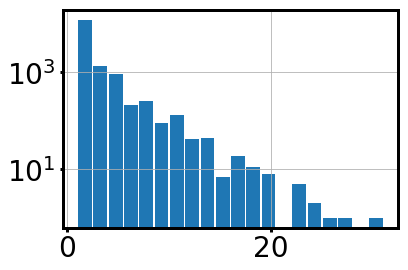

In [138]:
data_dur_condena['tiempo_sin_condena'] = data_dur_condena['fecha_condenado'] - data_dur_condena['fecha_detencion']
data_dur_condena['tiempo_sin_condena'] = data_dur_condena['tiempo_sin_condena'].astype('timedelta64[Y]')
data_dur_condena['tiempo_sin_condena'].hist(bins=20, rwidth=0.9, density=False, log=True);

In [139]:
data_dur_condena['tiempo_sin_condena'].describe()

count    15035.000000
mean         2.081809
std          2.086422
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         31.000000
Name: tiempo_sin_condena, dtype: float64

In [140]:
data_dur_condena['tiempo_sin_condena'].sort_values().values[-10:]

array([22., 22., 22., 22., 23., 24., 24., 25., 27., 31.])

El histograma indica que existe una distribución centrada en un valor cercano a cero, y que decae, de manera aproximadamente exponencial, hacia valores negativos y positivos. Mientras que los valores positivos no parecen, a priori, extraños, es necesario interpretar los valores negativos. Para esto, hay que preguntarse si existe alguna condición en la que la fecha de condenado pueda preceder a la fecha de detención. 

Existen algunas hipótesis que podrían dar lugar a una situación de este tipo. La primera es que una persona podría haber recibido la condena sin estar detenida, o estando detenida en un establecimiento policial, cuyos datos no están dentro de la base de datos, y haber sido incorporada al servicio penitenciario un tiempo después. Podría suceder, incluso, que una persona se de a la fuga después de haber sido condenada, y antes de ser detenida. La segunda es que una persona puede tener múltiples causas. Se puede dar el caso en que una persona haya sido condenada por una causa y que, habiendo cumplido su condena, haya sido detenida por un segundo delito. En ese caso, podría ser que el registro muestre la fecha de condena de la primera causa, y la fecha de detención de la segunda. Para testear esta hipótesis, se podría estudiar si los registros para los cuales la diferencia de tiempos es negativa corresponde a registros de reincidentes.

Para este primer análisis, vamos a considerar todos los valores negativos como outliers y descartarlos. Más adelante, buscaremos evaluar estas hipótesis.

In [136]:
mask = data_dur_condena['tiempo_sin_condena'] > 0
data_dur_condena[mask].shape[0]

15035

/home/nahuel/anaconda3/envs/diploDatos/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


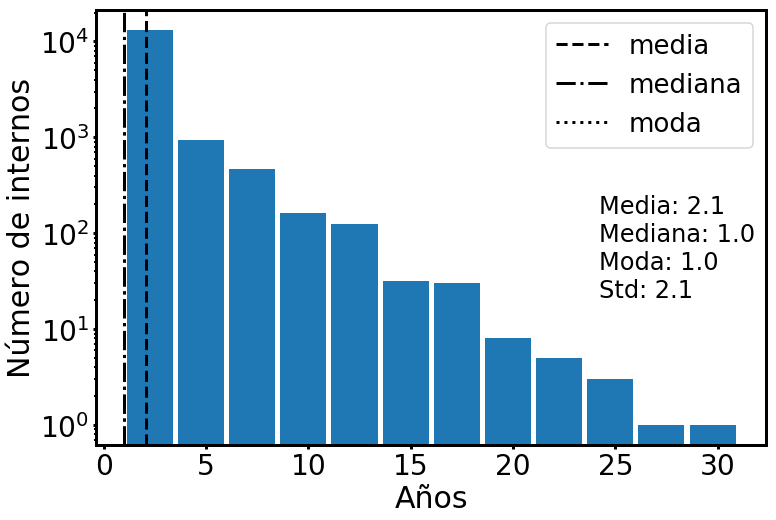

In [141]:
data_dur_condena = data_dur_condena[mask]
tiempo_sin_condena_anios = data_dur_condena['tiempo_sin_condena']

moda = tiempo_sin_condena_anios.mode().values[0]
media = tiempo_sin_condena_anios.mean()
mediana = tiempo_sin_condena_anios.median()
std = tiempo_sin_condena_anios.std()

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlabel('Años')
ax.set_ylabel('Número de internos')
ax.hist(tiempo_sin_condena_anios.values, rwidth=0.9, log=True, bins=12)
ax.axvline(media, linestyle='--', color='k', label='media')
ax.axvline(mediana, linestyle='-.', color='k', label='mediana')
ax.axvline(moda, linestyle=':', color='k', label='moda')
text = 'Media: {:.1f}\nMediana: {:.1f}\nModa: {:.1f}\nStd: {:.1f}'.format(media, mediana, moda, std)
ax.text(0.75, 0.34, text, transform=ax.transAxes, fontsize=24)
ax.legend(loc='best')
plt.savefig('../Informe/graficos/diff_condenado_detencion.png')
plt.show()